# Estadística para Ciencia de los Datos
# Tarea #4 - Semana #4


##Instrucciones
Realice los siguientes ejercicios y envíe sus respuestas, en un archivo PDF, a través de TEC Digital a más tardar el domingo 13 de octubre a las 10 PM. No se aceptarán entregas tardías.

Desarrolle todos los ejercicios con el mayor nivel de detalle posible. Se espera que el desarrollo algebraico sea formal. No será válido únicamente dar respuestas en prosa a las preguntas.

1. Los tiempos de servicio para los clientes que pasan por la caja en una tienda de venta al menudeo son variables aleatorias independientes con media de 1.5 minutos y varianza de 1.0 minutos por cliente. 

  Calcule la probabilidad de que 100 clientes puedan ser atendidos 2 horas o menos de tiempo total de servicio.



2. A partir del archivo 'MYOPIA', trabaje con las columnas AGE y COMPHR  y resuelva los siguientes enunciados. En el archivo 'MYOPIA_Code_Sheet' encontrará unas descripción de los datos contenidos en el dataset, considere esta descripción para la interpretación de sus resultados.

- Con la totalidad de los datos, calcule un intervalo de confianza al 95% para la columna AGE.
- Interprete los resultados del punto anterior.
- Ahora calcule el mismo intervalo al 95% de confianza solamente con los primeros **25 casos** del archivo de datos. 
- Explique que impacto tiene la disminución de la muestra sobre el intervalo de confianza.
- Con la totalidad de los datos, calcule un intervalo de confianza al 95% para la columna COMPHR.
- Interprete los resultados del punto anterior.
- Ahora calcule el mismo intervalo al 95% de confianza solamente con los primeros **100 casos** del archivo de datos. 
- Explique que impacto tiene la disminución de la muestra sobre el intervalo de confianza.


3. Evalue gráficamente y por medio de la prueba de Kolgomorov Smirnov la normalidad de las siguientes variables: COMPHR, SPORTHR y READHR. Explique detallamente que muestran los gráficos de histograma y qqplot sobre la normalidad de cada una de las variables.



**Punto #1**

In [0]:
#1)
# media mu = 1
# varianza sigma = 1.0
#n = 100






1) Se denota que $X_i$ el tiempo de servicio de un cliente $i$, entonces se quiere calcular:


\begin{equation}
P\left(\overline{x}≤\dfrac{120}{100}\right)=P\left(\overline{x}≤1.20\right)
\end{equation}



---



Como el tamano de la muestra es grande, el teorema del limite central dice que  $\overline{X}$ Y esta distribuido normalmente en forma aproximada con  $\mu=1.5$ y $\sigma_{\overline{x}}^2 = \sigma^2/n=1.0/100$


Podemos entonces, calcular el valor $Z$ para nuestro punto de interés en la distribución:

$Z=\frac{1.20-1.50}{\sqrt{1/100}}=3$

y obtener la probabilidad $p(Z≤3)$




In [0]:
# Se calcula en scipy
import scipy.stats as st
1-st.norm.cdf(3)

0.0013498980316301035

$p(Z>3)=0.0013$ tan solo hay un $0.013$% de probabilidad.


La probabilidad de que 100 clientes puedan ser atendidos en menos de 2 horas es aproximadamente 0.0013. Entoces se dice que atender a 100 clientes en menos de 2 horas es practicamente imposible.

**Punto #2**

In [0]:
# lectura de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from numbers import Number
import math
import torch
from torch.distributions import Exponential
from torch.distributions import Uniform
from torch.distributions import Normal
from torch.distributions.exp_family import ExponentialFamily
from torch.distributions.utils import broadcast_all

In [0]:
# lectura del dataset
data= pd.read_csv("https://raw.githubusercontent.com/jpablofdez/DataScience/master/Estadistica/Tareas/Tarea4/MYOPIA.csv", sep=';')

In [3]:
data.head()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [0]:
def MostrarDistribucion(datos,columna,binPlot=10):
  plt.figure()
  n, bins, patches = plt.hist(datos,density=True,bins=binPlot)
  plt.ylabel("Probability")
  plt.title("Distribución de Columna: "+columna)
  plt.show()

def MuestrasColumna(datosColumna,n,totalMuestras,useSeed=False,seedAdd=0):
  muestras = []
  medias = []
  for i in range(totalMuestras):
    if(useSeed):
      np.random.seed(i+seedAdd)
    muestra = np.random.choice(datosColumna, n)
    muestras.append(muestra)
    media = np.average(muestra)
    medias.append(media)
  return(muestras,medias)

def MostrarColumna(mediasColumna,columna):
  media = round(np.average(mediasColumna),3)
  print("Media Muestral:",media)
  print("\n")
  plt.figure()
  plt.hist(mediasColumna)
  plt.title("Distribución de Muetras de Columna: "+columna)
  plt.axvline(media,linewidth=1, color='r')
  plt.show()
  
def ErrorBarColumna(mediasColumna,muGeneral,error):
  plt.figure()
  plt.errorbar(np.arange(len(mediasColumna))+1,mediasColumna, yerr=error, ls='',
                            elinewidth=1, capsize=5)
  plt.scatter(np.arange(len(mediasColumna))+1,mediasColumna,s=8)
  plt.axhline(muGeneral, color='r',lw=1,label="u")
  plt.show()

  
def ObtenerMuestra(datos,n,seed=10):
  np.random.seed(seed)
  muestra = np.random.choice(datos, n)
  xbar = np.average(muestra)
  print("Media de la muestra (x barra):",round(xbar,3))
  return xbar

def IntervalosConfianza(mu,sigma,intervalo,n,canPrint=True):
  div = sigma / math.sqrt(n)
  zAlpha = stats.norm.ppf((1+intervalo)/2)
  rango = zAlpha*div
  superior = mu + rango
  inferior = mu - rango
  if(canPrint):
    print()
    print("Confianza:",intervalo)
    print("Rango inferior:",inferior)
    print("Rango superior:",superior)
    print()
    print("P("+str(round(inferior,2))+" <= mu <= "+str(round(superior,2))+") = "+str(intervalo))
  return(inferior,superior)

def TamanoN(sigma,error,intervalo):
  zValue = stats.norm.ppf((1+intervalo)/2)
  nResultado = ((zValue * sigma)/error) ** 2
  return math.ceil(nResultado)

def HistogramasResultados(datos,binPlot=10):
  histogram, histogramX = np.histogram(datos,bins=binPlot)
  
  histogram = torch.tensor(histogram,dtype=torch.float64)
  histogramX = torch.tensor(np.delete(histogramX,0),dtype=torch.float64)
  #number of observations
  n = histogram.sum()
  histogramNorm = torch.div(histogram, n)
  #calculate cumulative sum
  cdfEmpirical = torch.cumsum(histogramNorm, dim = 0)
  return(histogramX,cdfEmpirical)

def PlotKS(histogramX,cdfEmpirical,cdfIdeal):
  plt.figure()
  plt.plot(histogramX.numpy(),cdfEmpirical.numpy(),label="Empirico")
  plt.plot(histogramX.numpy(),cdfIdeal.numpy(),label="Ideal",color="red")
  plt.ylabel("Probability")
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()

def ResultadoKS(dn,kolDistValue,n):
  print(str(dn)+" < ("+str(kolDistValue)+" / SQRT("+str(n)+") = "+str(kolDistValue / math.sqrt(n))+") is "+str(dn < (kolDistValue/ math.sqrt(n))))
  
  
def CompararDistribuciones(datos,pdfArray,binPlot=10):
  plt.figure()
  n, bins, patches = plt.hist(datosColumna,density=True,label="Distribución Datos",bins=binPlot)
  x,y,titulo,leyenda = pdfArray
  plt.plot(x,y,color='red',label=leyenda)
  plt.ylabel('Probabilidad')
  plt.title("Histograma Datos vs "+titulo)
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()
  
def KSNormal(datos, meanHist, stdHist, binPlot=10,kolDistValue=1.3581):
  histogramX,cdfEmpirical = HistogramasResultados(datos,binPlot)
  #Create ideal CDF
  normalDensity = Normal(meanHist, stdHist)
  cdfNormalIdeal = normalDensity.cdf(histogramX)
  #Compare the empirical and ideal distributions
  difference = torch.abs(cdfNormalIdeal - cdfEmpirical)
  dn = torch.max(difference)
  PlotKS(histogramX,cdfEmpirical,cdfNormalIdeal)
  ResultadoKS(dn.item(),kolDistValue,len(datos))

Pruebas para la columna Age


In [0]:
age = data['AGE']
comphr = data['COMPHR']

In [6]:
age.describe()

count    618.000000
mean       6.299353
std        0.712950
min        5.000000
25%        6.000000
50%        6.000000
75%        6.000000
max        9.000000
Name: AGE, dtype: float64

In [0]:
sigma = np.std(age)
mu = np.mean(age)

In [8]:
sigma

0.7123730127003843

In [9]:
round(sigma,2)

0.71

In [10]:
round(mu,2)

6.3

In [0]:
# Con la totalidad de los datos, calcule un intervalo de confianza al 95% para la columna AGE.
conf_int = stats.norm.interval(0.95, loc=mu, scale=sigma)


In [12]:
conf_int

(4.903127302358014, 7.69557819926011)

Con la totalidad de los datos, calcule un intervalo de confianza al 95% para la columna AGE.

In [18]:
n = 100
xbar = ObtenerMuestra(age,n)

Media de la muestra (x barra): 6.3


In [14]:
intervalo = 0.95

IC_Inf,IC_Sup = IntervalosConfianza(mu,sigma,intervalo,n)


Confianza: 0.95
Rango inferior: 6.159730205963957
Rango superior: 6.438975295654167

P(6.16 <= mu <= 6.44) = 0.95


Ahora calcule el mismo intervalo al 95% de confianza solamente con los primeros 25 casos del archivo de datos.

In [19]:
n = 25
xbar = ObtenerMuestra(age,n)

Media de la muestra (x barra): 6.2


In [20]:
intervalo = 0.95

IC_Inf,IC_Sup = IntervalosConfianza(mu,sigma,intervalo,n)


Confianza: 0.95
Rango inferior: 6.020107661118852
Rango superior: 6.578597840499271

P(6.02 <= mu <= 6.58) = 0.95


Con la totalidad de los datos, calcule un intervalo de confianza al 95% para la columna COMPHR.

In [0]:
comphr = data['COMPHR']

In [0]:
sigma = np.std(comphr)
mu = np.mean(comphr)

In [23]:
round(sigma,2)
round(mu,2)

2.11

In [24]:
n = 100
xbar = ObtenerMuestra(comphr,n)

Media de la muestra (x barra): 2.14


In [25]:
intervalo = 0.95

IC_Inf,IC_Sup = IntervalosConfianza(mu,sigma,intervalo,n)


Confianza: 0.95
Rango inferior: 1.5065982768276083
Rango superior: 2.703757710227408

P(1.51 <= mu <= 2.7) = 0.95


Ahora calcule el mismo intervalo al 95% de confianza solamente con los primeros 100 casos del archivo de datos.

In [26]:
n = 100
xbar = ObtenerMuestra(age,n)

Media de la muestra (x barra): 6.3


In [27]:
intervalo = 0.95

IC_Inf,IC_Sup = IntervalosConfianza(mu,sigma,intervalo,n)


Confianza: 0.95
Rango inferior: 1.5065982768276083
Rango superior: 2.703757710227408

P(1.51 <= mu <= 2.7) = 0.95


**Punto #3**

Prueba de normalidad de Kolmogorov-Smirnov
Se van a realizar el test de KS con una confianza de  1−α=0.95

In [0]:
CompararDistribuciones(datosColumna,NormalPDF(age,100,sigma,10),15)

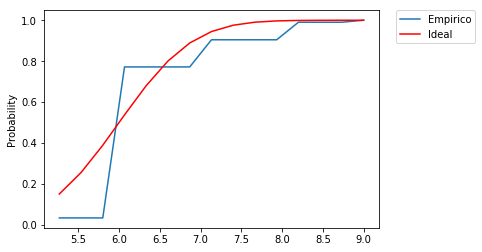

0.35510997353728746 < (1.3581 / SQRT(618) = 0.05463079388748345) is False


In [0]:
KSNormal(age,6,0.71,15)